In [450]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron

In [451]:
# Importing the dataset
data = pd.read_csv('fetal_health.csv')

## Data Exploration

In [452]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [454]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Text(0.5, 0.98, 'Histogram of Features')

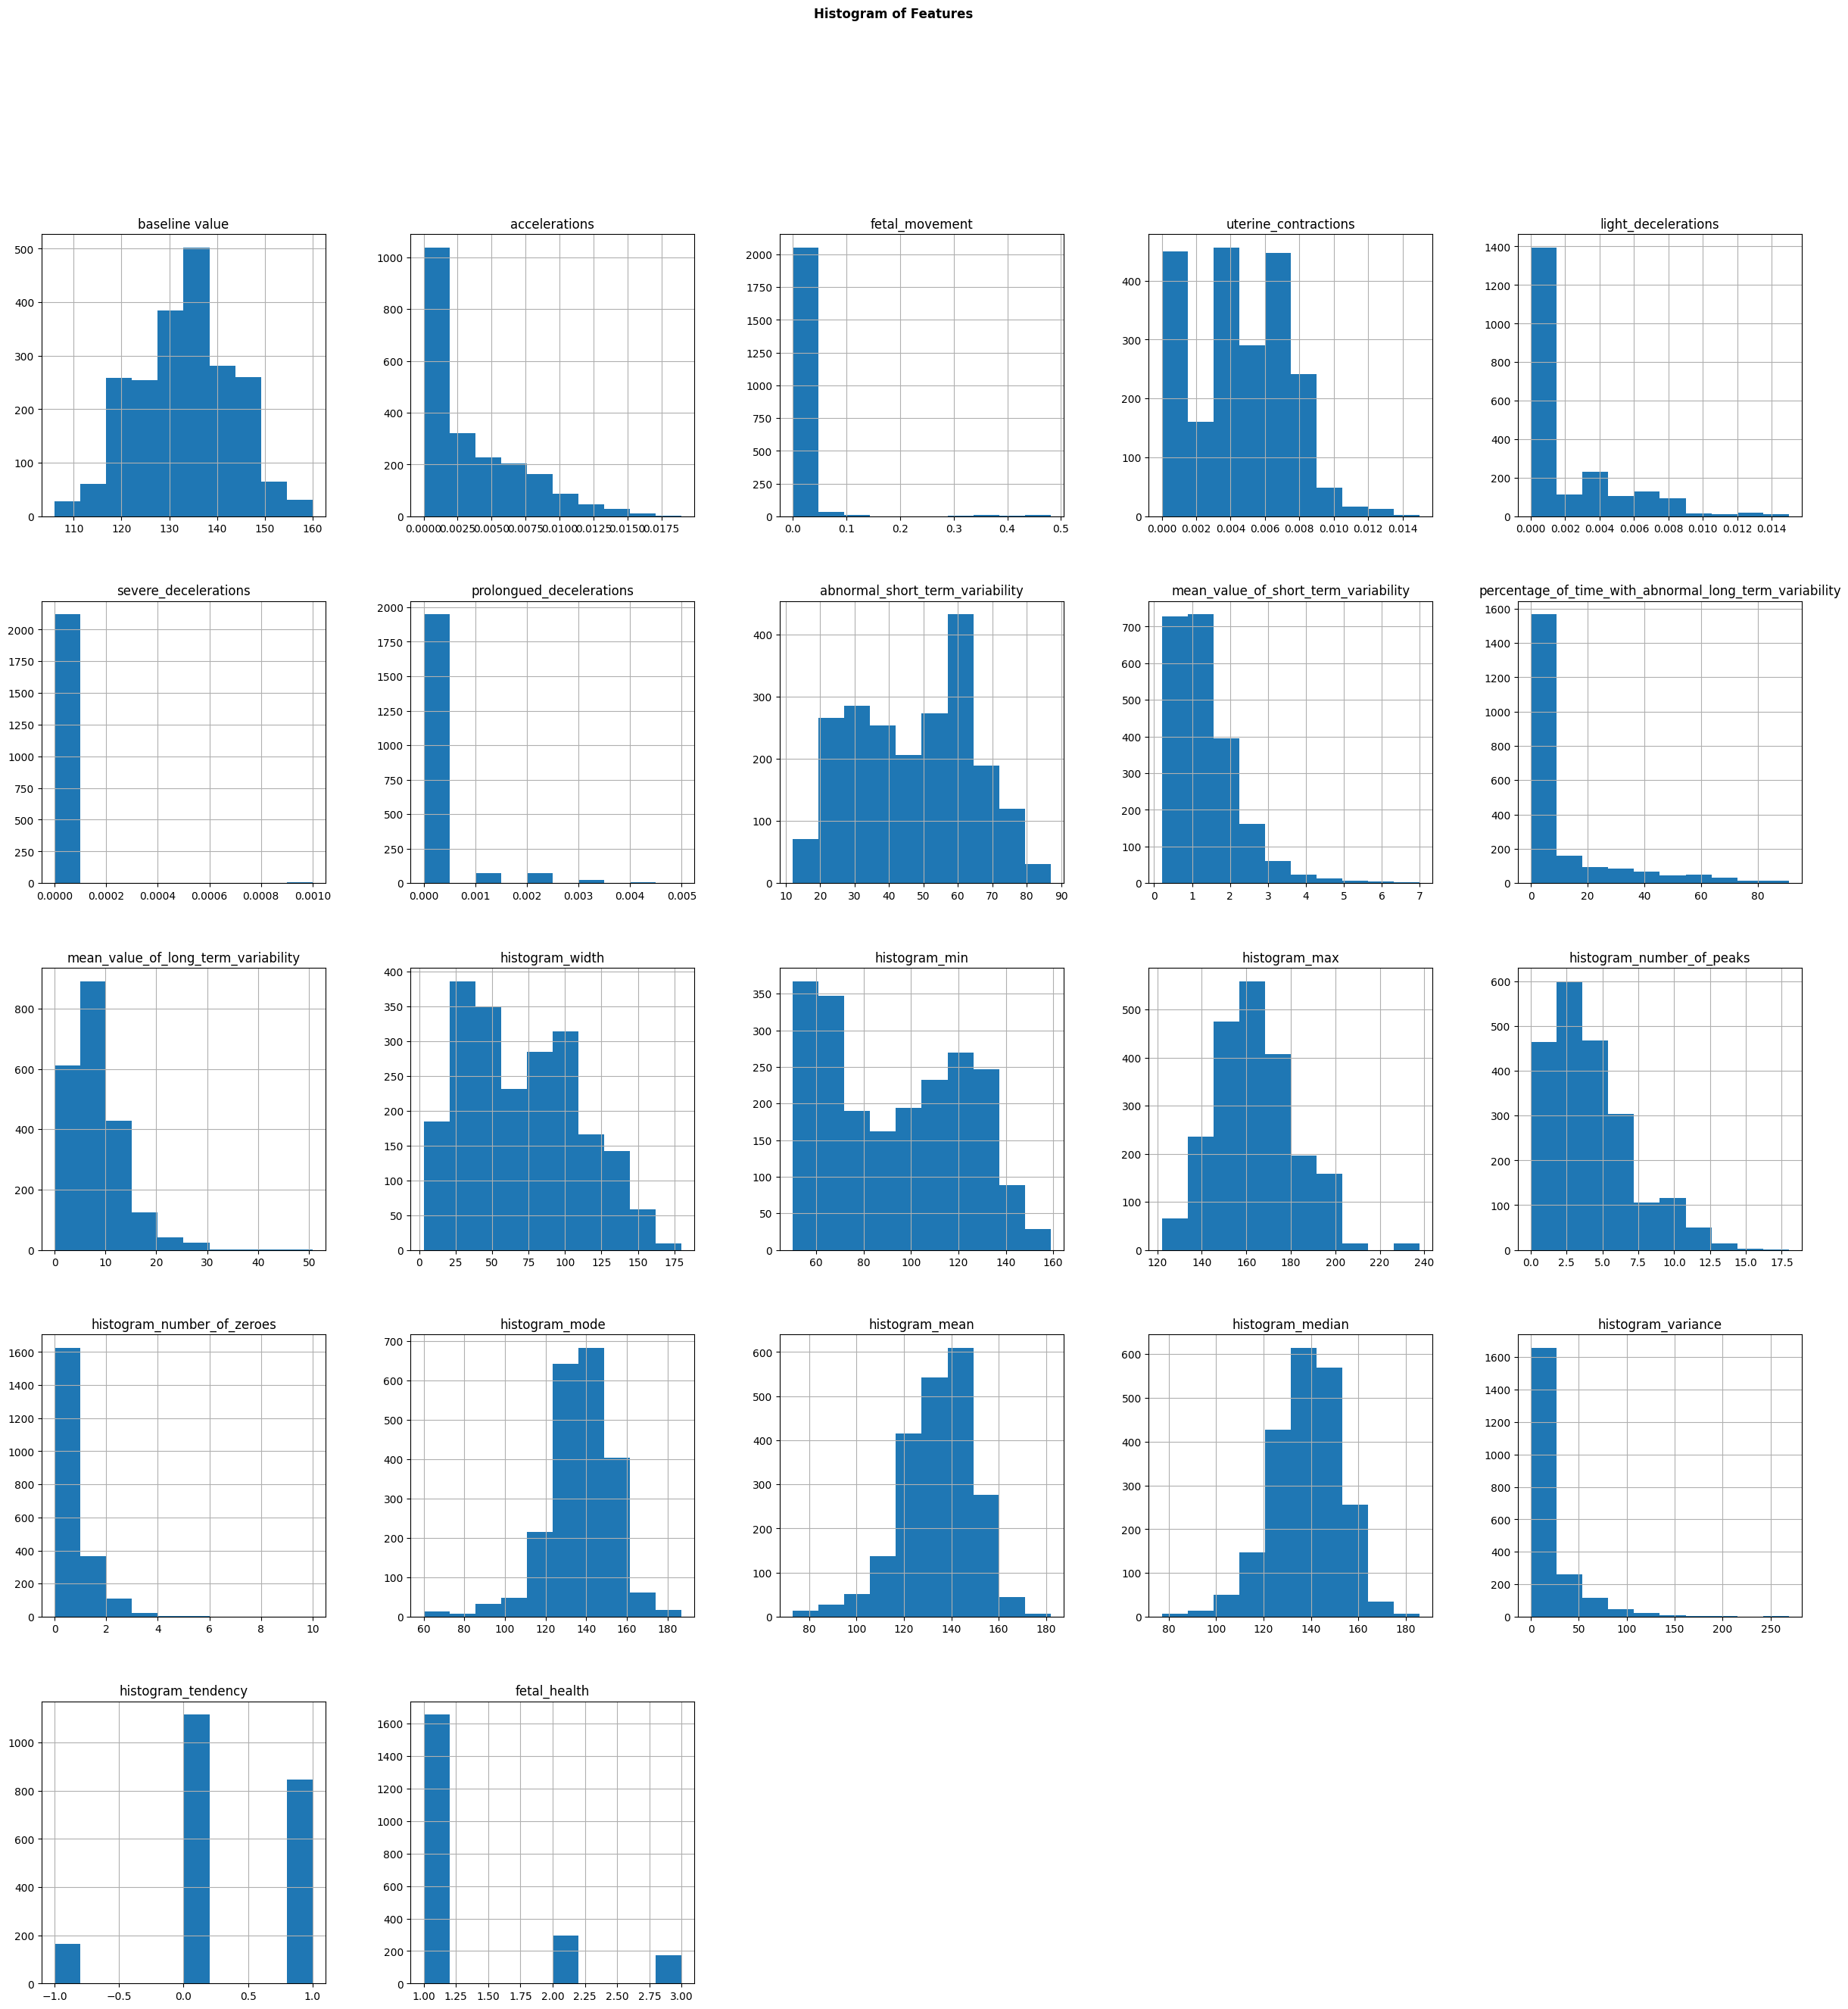

In [455]:
# Plot histogram for the features
data.hist(bins=10, figsize=(30, 30), grid=True)
plt.suptitle('Histogram of Features',fontweight='bold')

## Data Preprocessing

In [456]:
# data preprocessing
# check duplicates, missing value
print(f"Duplicated Data:{data.duplicated().sum()}, Null Data:{data.isnull().sum().sum()}")
# drop duplicates
data.drop_duplicates(inplace=True)

Duplicated Data:13, Null Data:0


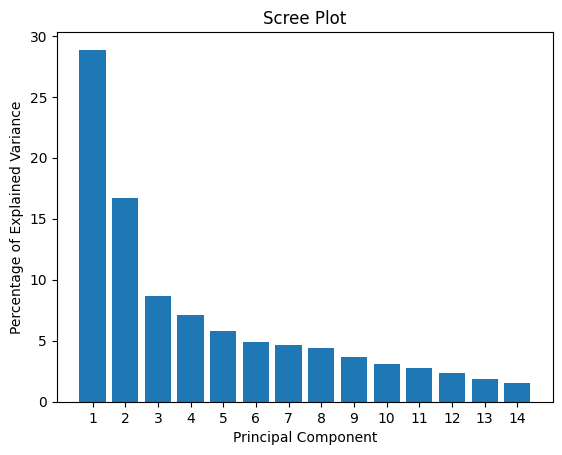

In [457]:
# Using PCA to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns='fetal_health'))
pca=PCA(n_components=0.95)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=100)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [458]:
# data split
X_train, X_test, y_train, y_test = train_test_split(pca_data, data['fetal_health'], test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Correlation Matrix')

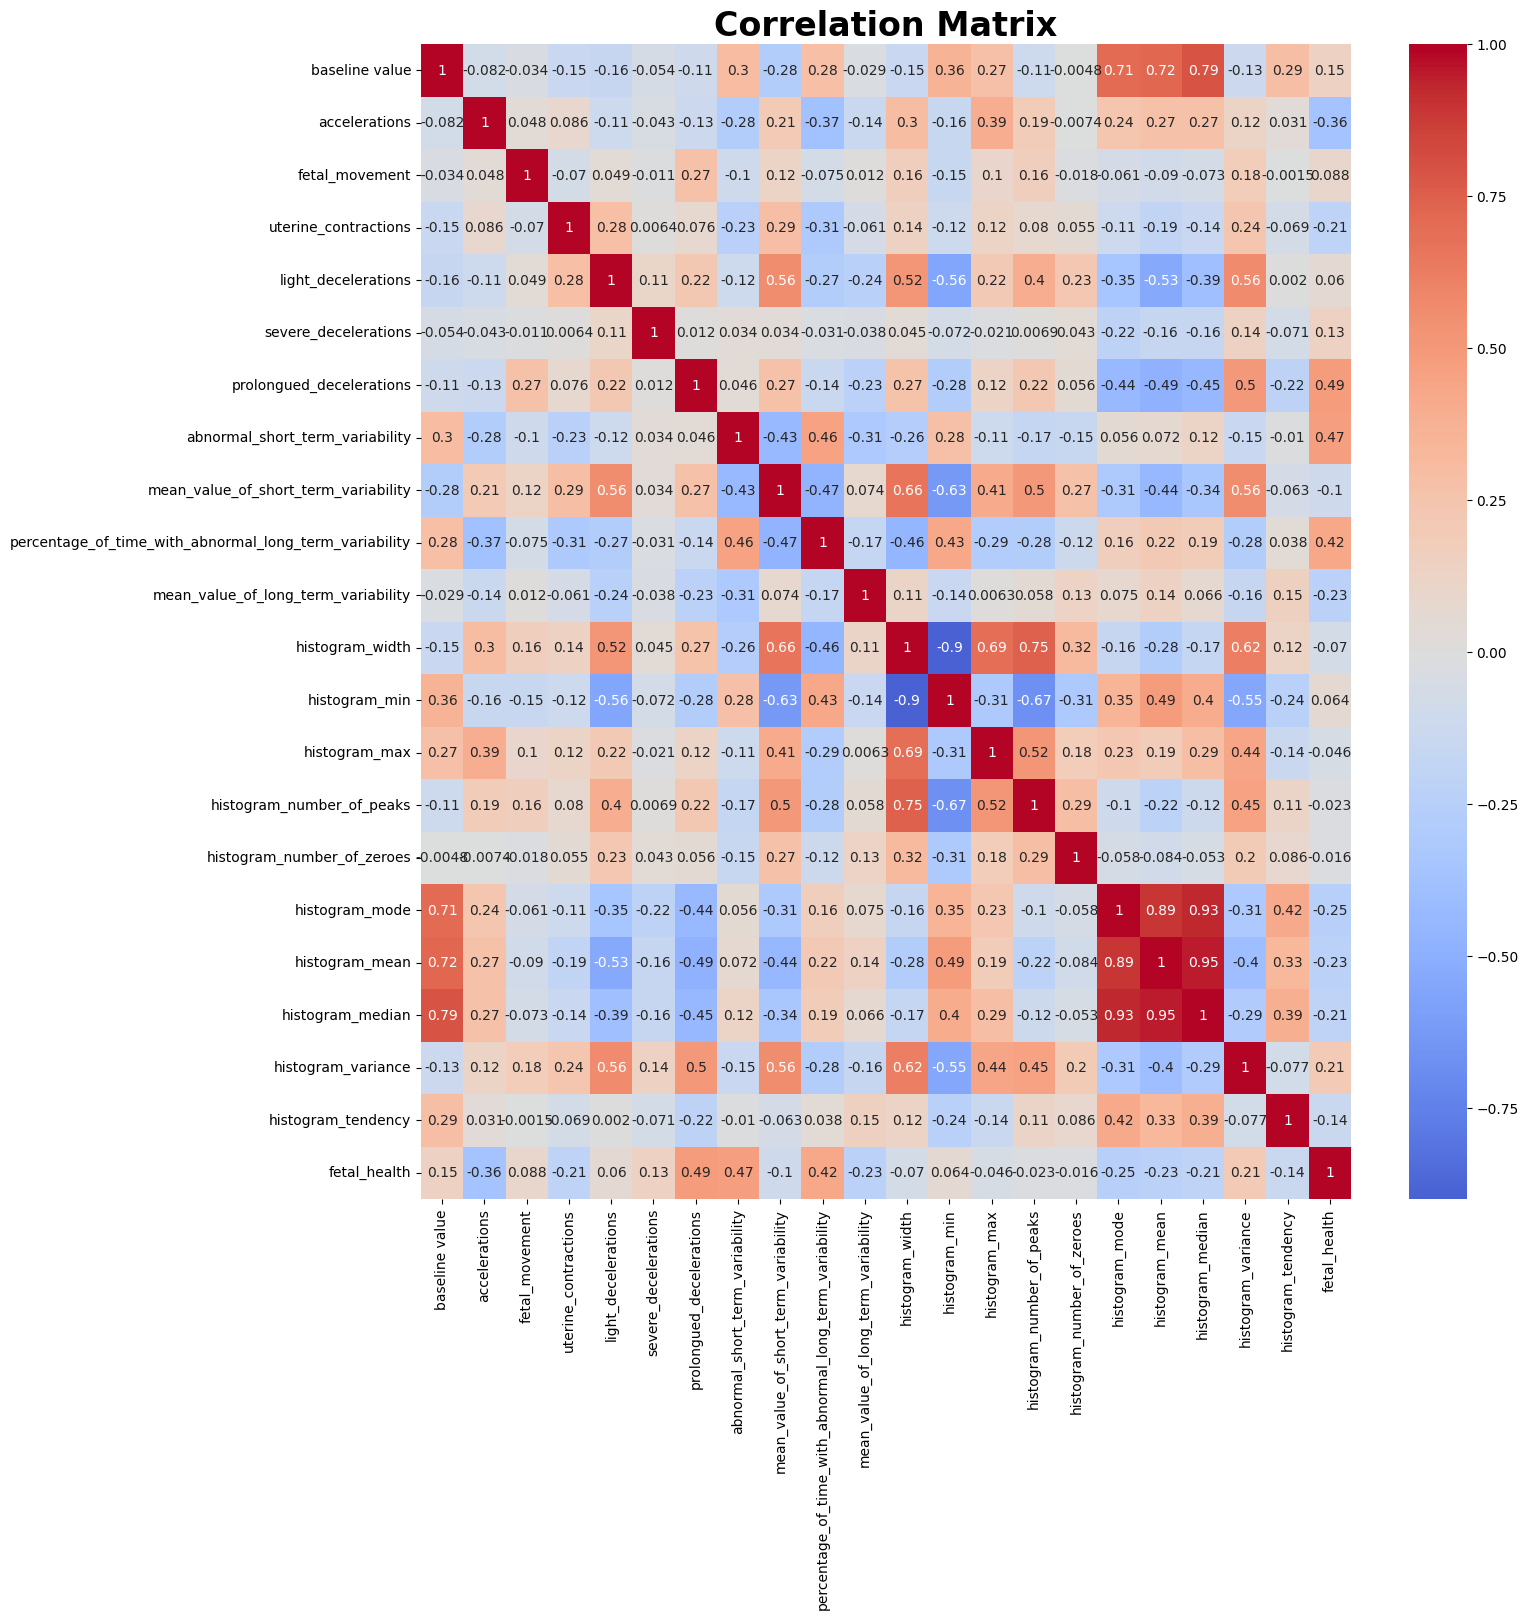

In [459]:
correlation_matrix=data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix',
          fontsize=24,
          fontweight='bold')

Text(0.5, 1.0, 'Correlation of Numerical Features with fetal_health')

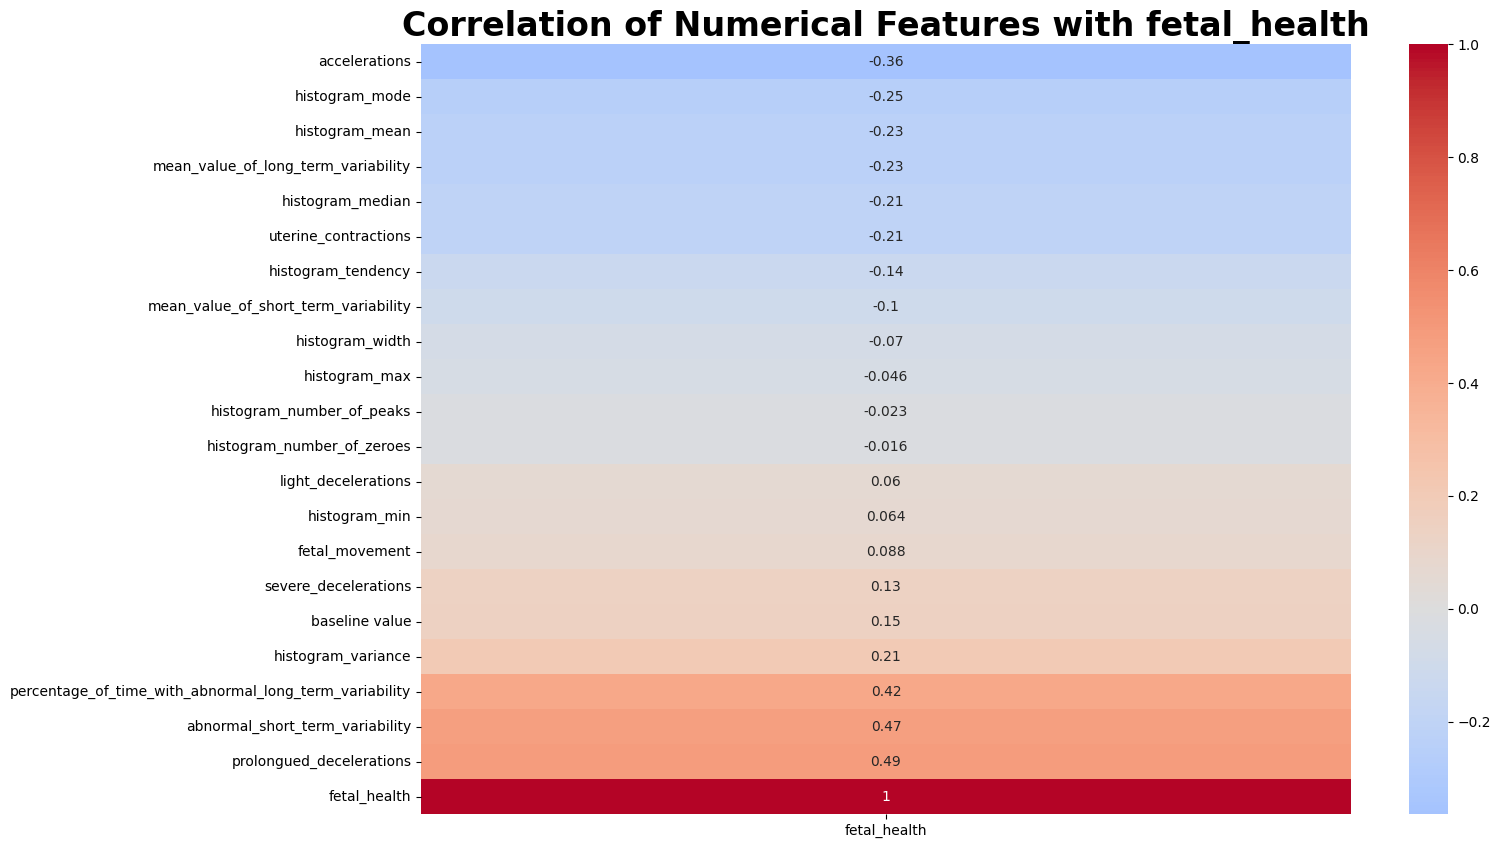

In [460]:
correlation_matrix = data.corr()['fetal_health']

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title("Correlation of Numerical Features with fetal_health",
                    fontsize=24,
                    fontweight="bold")

## Data Analysis

In [461]:
# plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm', center=0,xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

### Linear Classifiers

#### Perceptron

Average Cross Validation Score: 0.8115917672235107
Accuracy: 0.8959810874704491
64


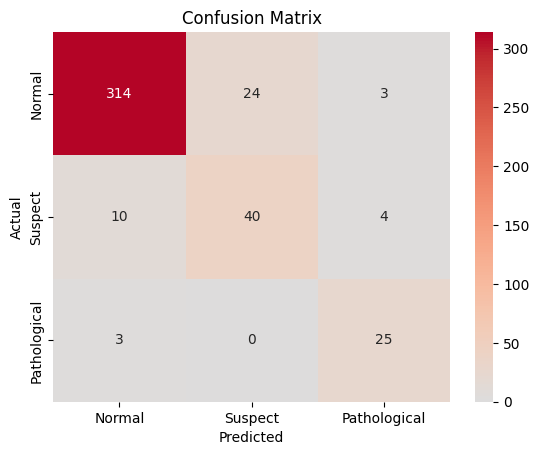

In [462]:
clf = Perceptron()
mean_score=cross_val_score(clf, pca_data, data['fetal_health'], cv=5, scoring='accuracy').mean()
print(f"Average Cross Validation Score: {mean_score}")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# weights = clf.coef_
# bias = clf.intercept_
# print(f"Weights: {weights}")
# print(f"Bias: {bias}")
plot_confusion_matrix(y_test, y_pred)

#### Logistic Regression

Average Cross Validation Score: 0.851358497753577
Accuracy: 0.9243498817966903


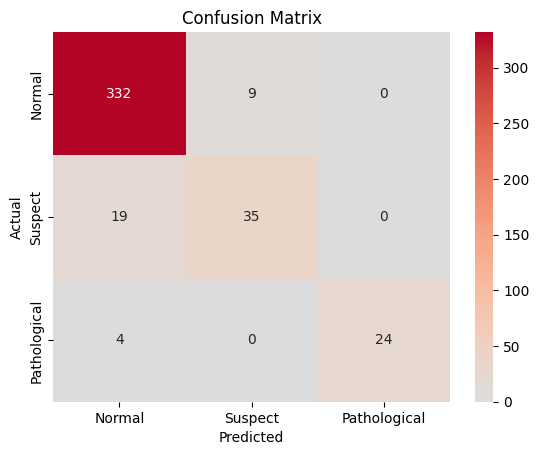

In [463]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
mean_score=cross_val_score(model, pca_data, data['fetal_health'], cv=5, scoring='accuracy').mean()
print(f"Average Cross Validation Score: {mean_score}")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
plot_confusion_matrix(y_test, y_pred)

#### Linear Support Vector Machine(SVM)

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python31

Average Cross Validation Score: 0.840940920753364
Accuracy: 0.9219858156028369


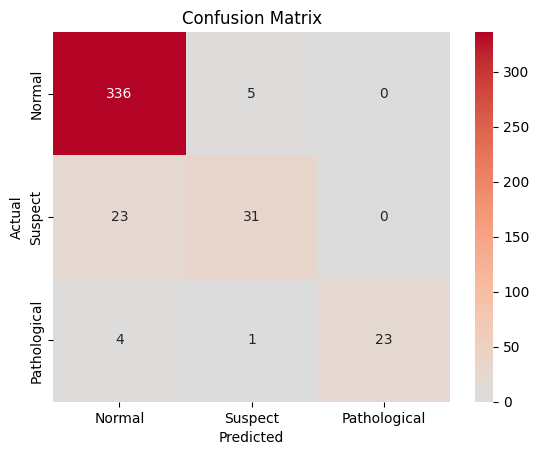

In [464]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
mean_score=cross_val_score(svm_model, pca_data, data['fetal_health'], cv=5, scoring='accuracy').mean()
print(f"Average Cross Validation Score: {mean_score}")
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
plot_confusion_matrix(y_test, y_pred)

### Non-Linear Classifiers

#### KNN

Max Accuracy: 0.9196217494089834, K: 2
Max Average Cross Validation Scorean: 0.8442819849192744, K:26


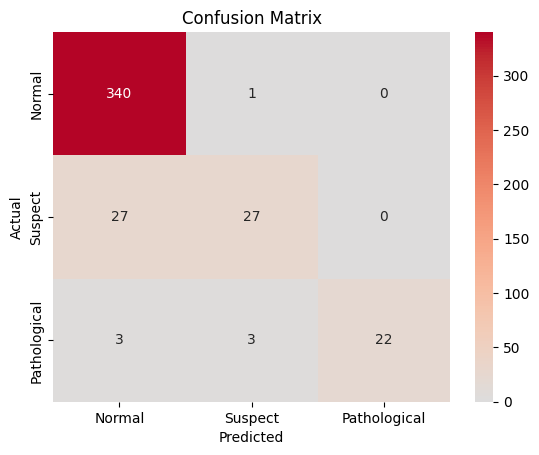

In [465]:
from sklearn.neighbors import KNeighborsClassifier
n=range(1,30)
max=0
max_pred=[]
k1=0
max_mean_score=0
k2=0
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i) # Using Euclidean distance 
    mean_score=cross_val_score(knn, pca_data, data['fetal_health'], cv=5, scoring='accuracy').mean()
    # print(f"Average Cross Validation Score: {mean_score}")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    if score>max:
        max=score
        max_pred=y_pred
        k1=i
    if mean_score>max_mean_score:
        max_mean_score=mean_score
        k2=i
    # print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Max Accuracy: {max}, K: {k1}\nMax Average Cross Validation Scorean: {max_mean_score}, K:{k2}")
plot_confusion_matrix(y_test, max_pred)